In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/player_data_clean.csv')
rand_seed = 41

In [3]:
df.head()

,Unnamed: 0,seas_id,season,player_id,player,age,experience,tm,g,gs,...,bpm,vorp,person_id,height,weight,pos_PG,pos_SG,pos_PF,pos_SF,pos_C
0,0,31137,2024,5026,A.J. Lawson,23,2,DAL,42,0.0,...,-4.6,-0.2,1630639,78,179.0,False,True,False,False,False
1,1,30459,2023,5026,A.J. Lawson,22,1,TOT,15,0.0,...,-4.4,-0.1,1630639,78,179.0,False,True,False,False,False
2,3,30461,2023,5026,A.J. Lawson,22,1,DAL,14,0.0,...,-4.6,-0.1,1630639,78,179.0,False,True,False,False,False
3,4,31138,2024,5027,AJ Griffin,20,2,ATL,20,0.0,...,-9.6,-0.3,1631100,78,220.0,False,False,False,True,False
4,5,30467,2023,5027,AJ Griffin,19,1,ATL,72,12.0,...,-0.8,0.4,1631100,78,220.0,False,False,False,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11607 entries, 0 to 11606
Data columns (total 78 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     11607 non-null  int64  
 1   seas_id                        11607 non-null  int64  
 2   season                         11607 non-null  int64  
 3   player_id                      11607 non-null  int64  
 4   player                         11607 non-null  object 
 5   age                            11607 non-null  int64  
 6   experience                     11607 non-null  int64  
 7   tm                             11607 non-null  object 
 8   g                              11607 non-null  int64  
 9   gs                             11607 non-null  float64
 10  mp                             11607 non-null  int64  
 11  fg_per_100_poss                11607 non-null  float64
 12  fga_per_100_poss               11607 non-null 

In [5]:
scaled_df = df.drop(columns=['g', 'gs', 'mp', 'tm', 'Unnamed: 0', 'seas_id', 'season', 'player_id', 'player', 'age'])
scaler = StandardScaler()
scaled_df = scaler.fit_transform(scaled_df)

In [6]:
scaled_df

array([[-0.96655715,  0.46117653,  0.4926652 , ..., -0.51109605,
        -0.48901677, -0.48210711],
       [-1.21323325,  1.26074307,  0.81982525, ..., -0.51109605,
        -0.48901677, -0.48210711],
       [-1.21323325,  1.12748198,  0.81982525, ..., -0.51109605,
        -0.48901677, -0.48210711],
       ...,
       [-0.22652886,  0.01697289,  0.51447587, ..., -0.51109605,
        -0.48901677, -0.48210711],
       [ 1.50020381,  1.43842453,  1.77949471, ...,  1.95657941,
        -0.48901677, -0.48210711],
       [ 0.76017552, -0.91585475, -1.07770302, ..., -0.51109605,
        -0.48901677, -0.48210711]])

In [7]:
pca = PCA()
pc_df = pca.fit_transform(scaled_df)
exp_var = np.cumsum(pca.explained_variance_ratio_)

<Axes: >

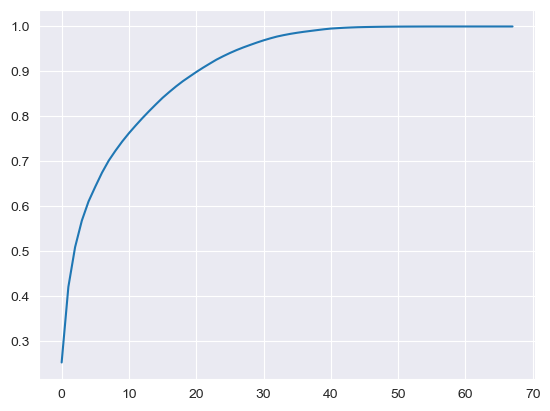

In [8]:
sns.lineplot(x=list(range(0,68)), y=exp_var)

In [9]:
exp_var[20], exp_var[30], exp_var[40]

(0.8987605436423041, 0.9691445338278355, 0.9953518814808993)

In [10]:
pc_df = pd.DataFrame(pc_df)
pc_df = pc_df.iloc[:, :31]

In [11]:
pc_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-2.404672,-1.239174,-2.027371,-2.104430,-2.645956,0.293408,-2.802147,1.246851,0.147618,0.122004,...,-0.067873,-0.002450,1.334001,0.585982,-0.036433,0.132538,0.234632,0.295937,0.197335,-0.104794
1,-2.870558,-0.709868,-4.304428,-3.712284,-3.847922,0.958830,-1.719043,0.552216,0.527035,1.107957,...,-0.172776,0.543925,1.441475,0.532626,-1.043052,0.887805,-0.030654,0.842877,-0.462660,0.133648
2,-3.233602,-0.835750,-4.169879,-3.781935,-3.884571,1.011630,-1.575150,0.347880,0.542497,1.079794,...,-0.118280,0.493170,1.368903,0.626703,-1.076284,0.654039,0.059946,0.836882,-0.453300,-0.009435
3,-5.861582,-5.446659,-1.964144,-4.795749,-1.518861,0.274224,0.988767,-0.098736,-0.251353,-2.750617,...,0.611684,-0.842306,-0.206591,0.323556,0.427947,-0.812918,0.891234,-0.137949,1.108818,-0.313792
4,-3.890384,0.434045,-3.407483,-2.093916,-0.569662,-1.615308,-0.906673,1.464966,-0.173387,-0.395155,...,0.729120,-0.322996,-0.617870,0.449525,-0.448640,0.153621,-0.302406,-0.193887,-0.026712,-0.402717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11602,4.274544,-5.470276,1.411106,-1.244730,-0.881366,-1.609281,1.538003,-0.521320,0.270495,0.336929,...,0.226658,-0.765254,0.192803,0.248288,-0.600684,0.037576,0.192187,0.021998,0.239707,-1.667115
11603,4.067782,-4.404021,0.515364,-1.764100,-2.075467,-2.361117,0.546752,-1.658605,-0.382824,0.156077,...,-0.161886,-0.089292,0.202106,-0.975880,0.289189,-0.397248,-0.042211,-0.749612,-0.578239,-0.392713
11604,-3.402865,-0.151588,-0.248821,-1.857470,-1.091895,0.411309,-0.809195,-1.892749,-0.737033,1.746771,...,0.446807,0.335530,-0.047351,-0.307890,-0.423098,0.029298,-0.348477,0.540191,1.115124,-0.206360
11605,2.468971,-2.550668,3.597735,-6.355170,1.820924,-2.092627,1.056248,1.475168,-0.665521,0.723001,...,-0.253516,-1.320503,-0.035802,0.185681,0.012387,1.524969,-0.741497,-0.139326,-0.074834,-0.144161


In [12]:
n_clusters = list(range(2, 21))
inertias = []
for n in n_clusters:
    model = KMeans(n_clusters=n, random_state=rand_seed, n_init='auto')
    model.fit(pc_df)
    inertias.append(model.inertia_)

<Axes: >

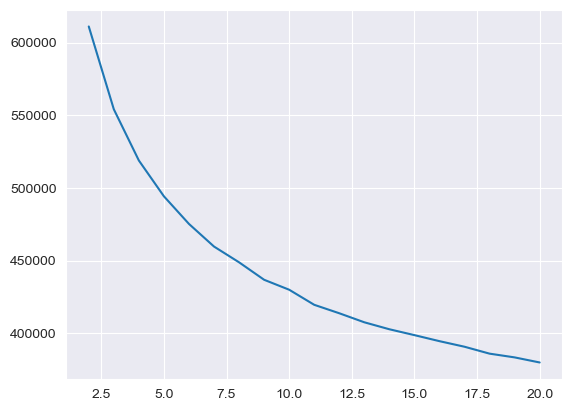

In [13]:
sns.lineplot(x=n_clusters, y=inertias)